In [1]:
import os
import pandas as pd
import numpy as np
from gensim.corpora.wikicorpus import WikiCorpus
from gensim.models.word2vec import Word2Vec, LineSentence
from pprint import pprint
from copy import deepcopy
from multiprocessing import cpu_count
import gensim
from sklearn.decomposition import TruncatedSVD

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.manifold import TSNE
from sklearn import cluster

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool

%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
model = Word2Vec.load('med_w2v')

In [4]:
stemmer = SnowballStemmer("russian")

In [28]:
stemmer.stem("бронхит")

'бронх'

In [30]:
model.most_similar('ларинг', topn=20)

[('ринофаринг', 0.7727226614952087),
 ('фаринг', 0.7435891032218933),
 ('ларинготрахе', 0.741643488407135),
 ('назофаринг', 0.7340249419212341),
 ('ларингит', 0.7321699857711792),
 ('трахе', 0.7102281451225281),
 ('тонзилл', 0.6485297679901123),
 ('трахеит', 0.636513352394104),
 ('стомат', 0.6119980216026306),
 ('аденоидит', 0.6078621745109558),
 ('катаральн', 0.6012295484542847),
 ('тонзилит', 0.5922653079032898),
 ('эндобронх', 0.5864366292953491),
 ('трахеобронх', 0.5848177075386047),
 ('трахеобронхит', 0.5798566341400146),
 ('глосс', 0.5764217972755432),
 ('ринофарингит', 0.5702421069145203),
 ('ангин', 0.563210666179657),
 ('рин', 0.5592923760414124),
 ('фаренг', 0.5573338270187378)]

In [8]:
allDiseases = pd.read_csv('diseases_all.csv')

In [9]:
allDiseases.head()

,disease
0,Агранулоцитозы
1,Аденовирусные заболевания
2,Аденома сальных желез симметричная
3,Акантоз черный
4,Акнеформные дерматозы


In [10]:
not_found = set()
found = set()
for i in allDiseases['disease']:
    tokens = gensim.utils.simple_preprocess(i)
    tmp2 = [word for word in tokens if word not in stopwords.words("russian")]
    for tok in tmp2:
        s = stemmer.stem(tok)
        if(s in model.wv.vocab):
            found.add(s)
        else:
            not_found.add(tok)

In [11]:
len(found), len(not_found)

(623, 40)

In [12]:
X = []
Y = []

In [13]:
# for i in found:
#     X.append(model[i])
#     Y.append(i)
# X = np.array(X)
# Y = np.array(Y)

In [14]:
X = model.syn0
Y = model.index2word

In [15]:
X = np.array(X)[:5000]
Y = np.array(Y)[:5000]

In [16]:
tsne = TSNE(n_components=2)
# svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)

In [17]:
%%time
X_embedded = tsne.fit_transform(X)

CPU times: user 2min 51s, sys: 14.1 s, total: 3min 5s
Wall time: 3min 19s


In [18]:
X_embedded.shape

(5000, 2)

In [19]:
trace = go.Scatter(
    x = X_embedded[:, 0],
    y = X_embedded[:, 1],
    mode = 'markers',
    text=Y
)

In [20]:
data = [trace]

In [21]:
py.iplot(data)

In [23]:
graph = nx.Graph()

In [24]:
graph.add_nodes_from(found)

In [25]:
for i in found:
    top = model.most_similar(i, topn=20)
    top = [i[0] for i in top if(i[0] in found)]
    
    for j in top:
        graph.add_edge(i, j)

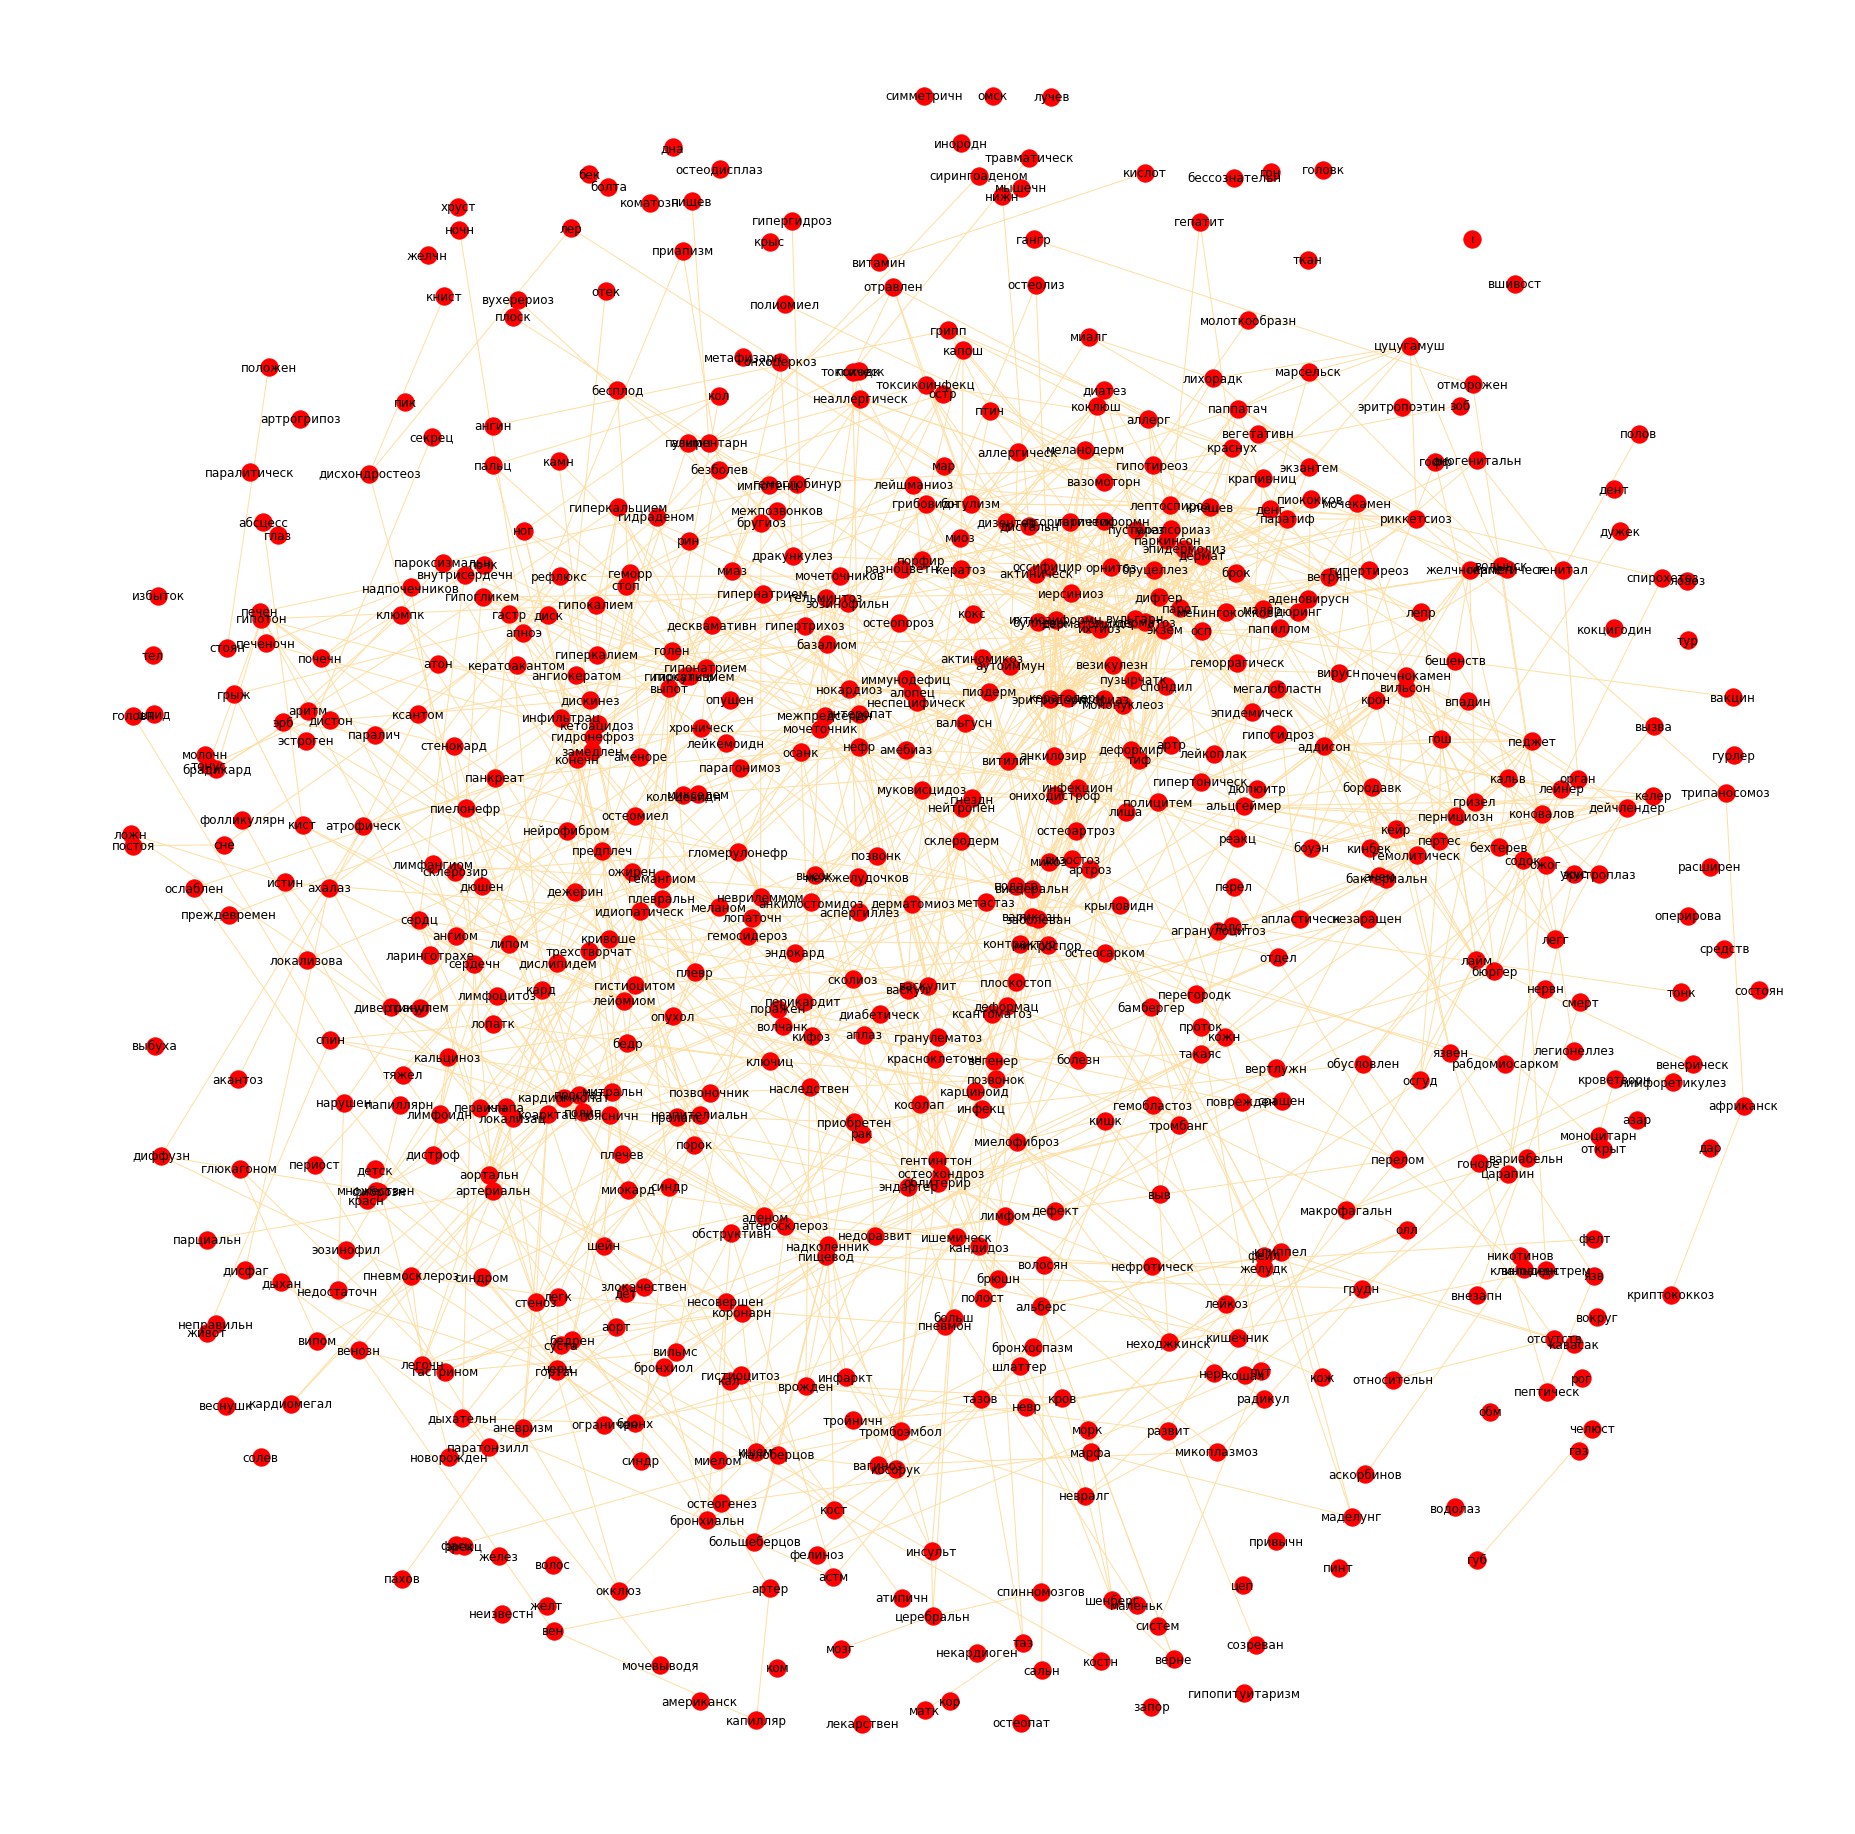

In [26]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(graph, pos=nx.spring_layout(graph, k=0.25, iterations=50), **options)
plt.show()